# Principal Component Analysis of Height and Weight Data

Weight and height are strongly correlated. 

But men and women have different weights heights. 

In this exercise you will investigate what information PCA extracts. 

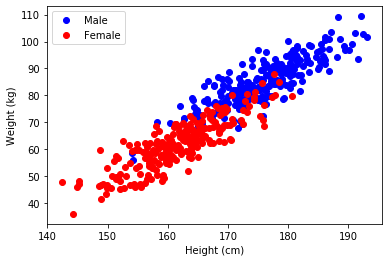

In [5]:
import matplotlib.pyplot as pl
import pandas as pd
%matplotlib inline

df = pd.read_csv('weights-heights-metric.csv')

pl.plot(df.loc[df['Gender']=='Male', 'Height'], df.loc[df['Gender']=='Male', 'Weight'],'bo',
        df.loc[df['Gender']=='Female', 'Height'], df.loc[df['Gender']=='Female', 'Weight'],'ro')
pl.xlabel('Height (cm)')
pl.ylabel('Weight (kg)')
pl.legend(['Male','Female']);

# Assignment 1: 

Compute PCA on a data set of weight and height of men and women. 

Plot the principal components of the data.

Which variance is captured by each principal component? 

In [6]:
import numpy as np
import scipy as sp

def pca(X, ncomp=2):
    # subtract the mean
    mu = X.mean(axis=0)
    Xcentered = X - mu
    # compute covariance matrix
    C = (Xcentered.T @ Xcentered) / X.shape[0]
    # compute eigenvectors of covariance matrix
    V, U = np.linalg.eig(C)
    return (Xcentered @ U)


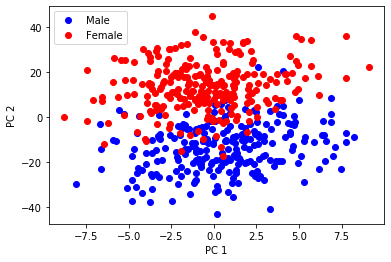

In [27]:
# perform PCA
X = df[['Height','Weight']] #.as_matrix();
Xpca = pca(X)
#print(X)
# plot data in PCA space
#pl.plot(Xpca[df['Gender']=='Male',0],Xpca[df['Gender']=='Male',1],'bo',
#       Xpca[df['Gender']=='Female',0],Xpca[df['Gender']=='Female',1],'ro')

pl.plot(Xpca.loc[df['Gender']=='Male', 0], Xpca.loc[df['Gender']=='Male', 1],'bo',
        Xpca.loc[df['Gender']=='Female', 0], Xpca.loc[df['Gender']=='Female', 1],'ro')

pl.xlabel('PC 1')
pl.ylabel('PC 2')
pl.legend(['Male','Female'])

# Assignment 2: 

Compute the covariance matrix of the original data. 

Compute the covariance matrix of the data in the PCA space. 

Print the covariance of the first and second dimension of the original and the PCA space. 

In [28]:
C = sp.cov(X.T)
Cpca = sp.cov(Xpca.T)
print(f"Cov weight/height: {C[0,1]}\nCov first PC/second PC {Cpca[0,1]}")

Cov weight/height: 133.0227029932385
Cov first PC/second PC -1.2530613376130022e-14


# Addon Visu and test: 

Compute test results

In [29]:
def cov(X):
    mu = X.mean(axis=0)
    Xc = X - mu
    return Xc.T @ Xc / (Xc.shape[0]-1)

In [30]:
t = cov(X)
#print(t.shape)
#print(type(t))
#print(t[0,0])
#print ('Upper right cov entry:',t[0,1]);
print('Full cov X: ',t);
print ('Full cov Cpca:',Cpca);

Full cov X:              Height      Weight
Height   96.956146  133.022703
Weight  133.022703  212.289924
Full cov Cpca: [[ 9.63852030e+00 -1.25306134e-14]
 [-1.25306134e-14  2.99607550e+02]]


0      116.873874
1      121.735140
2      139.845308
3      142.249954
4      104.311686
          ...    
495    117.964547
496    107.275163
497    139.659637
498    138.338165
499    108.545755
Length: 500, dtype: float64


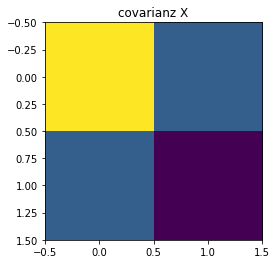

In [35]:
pl.imshow(X.T @ X)
pl.title('covarianz X');

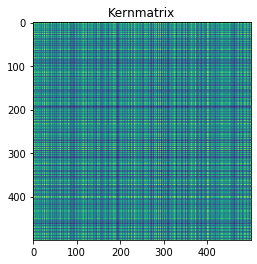

In [32]:
pl.imshow(X @ X.T)
pl.title('Kernmatrix');

In [ ]:
#
# oder mit SVD Lösen!
# (des kleineren Raumes)
#
# X.shape